**Grovers Search Algorithm**

Grovers is a quantum search algorithm which provides a quadratic speedup for unstructured search problems compared to classical algorithms. It is particularly useful when searching an unsorted database or when looking for a specific item in a large search space.

In classical computing, searching an unsorted database of size N would require checking each item individually, resulting in an average of N/2 attempts to find the desired item. This search complexity scales linearly with the size of the database.

In [54]:
#Importing necessary libraries
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

**Defining Oracle**

Oracle marks the desired solutions in a search problem.it flips the phase of the desired solutions.

We flip the phase by applying below gates

1)"X gate" on the marked element 

2)"MCT(Multiple-Controlled Toffoli (MCT) gate)" - It performs a phase flip on the target qubit if and only if all the control qubits are in the state |1>,so thats X operator is applied in step 1 to convert all 0 bits to 1.

3)Again X gate which undoes the X gate applied in step 1 ,reverting the marked state back to their original state.

In [55]:
def create_oracle(n, mark_num):
    """
    Creates the oracle circuit and gate for Grover's algorithm.

    Parameters:
    - n (int): Number of qubits
    - mark_num (str): Binary representation of the number to be marked

    Returns:
    - oracle_circuit (qiskit.QuantumCircuit): The oracle circuit
    - oracle_gate (qiskit.circuit.Gate): The oracle gate
    """
    # Create a quantum circuit with n+1 qubits
    oracle_circuit = QuantumCircuit(n + 1)

    # Apply X gates to the corresponding qubits based on the mark_num
    # to mark the desired state(s)
    for i, value in reversed(list(enumerate(mark_num))):
        if value == '0':
            oracle_circuit.x(n - 1 - i)

    # Apply the Multiple-Controlled Toffoli (MCT) gate to perform a phase flip
    # on the target qubit if all the control qubits are in the state |1>
    oracle_circuit.mct(list(range(n)), n, n)

    # Revert the X gates applied earlier to restore the qubits to their original state
    for i, value in enumerate(mark_num):
        if value == '0':
            oracle_circuit.x(n - 1 - i)

    # Convert the oracle circuit to a gate
    oracle_gate = oracle_circuit.to_gate()
    oracle_gate.name = 'Oracle'

    # Return the oracle circuit and gate
    return oracle_circuit, oracle_gate

**Defining Diffuser**

Diffuser increases the amplitude of marked state decreasing the amplitudes of all other states

Following gates are applied for amplification

1)"X gate" - This operation flips the state of each qubit

2)"Controlled-X" and "A series of controlled-X and controlled-phase gates between the first, second, and third qubits,These gate increases amplitudes of the desired states.

3)"X-gate" - which undoes the X gate applied in step 1 

In [56]:
def create_diffuser(n):
    """
    Creates the diffuser circuit and gate for Grover's algorithm.

    Parameters:
    - n (int): Number of qubits

    Returns:
    - diffuser_circuit (qiskit.QuantumCircuit): The diffuser circuit
    - diffuser_gate (qiskit.circuit.Instruction): The diffuser gate
    """
    diffuser_circuit = QuantumCircuit(n)
    
    diffuser_circuit.x(range(n))
    
    diffuser_circuit.cp(pi / 4, 0, 3)
    
    diffuser_circuit.cx(0, 1)
    diffuser_circuit.cp(-pi / 4, 1, 3)
    diffuser_circuit.cx(0, 1)
    
    diffuser_circuit.cp(pi / 4, 1, 3)
    
    diffuser_circuit.cx(1, 2)
    diffuser_circuit.cp(-pi / 4, 2, 3)
    
    diffuser_circuit.cx(0, 2)
    diffuser_circuit.cp(pi / 4, 2, 3)
    
    diffuser_circuit.cx(1, 2)
    diffuser_circuit.cp(-pi / 4, 2, 3)
    
    diffuser_circuit.cx(0, 2)
    diffuser_circuit.cp(pi / 4, 2, 3)
    
    diffuser_circuit.x(range(n))
    
    diffuser_gate = diffuser_circuit.to_instruction()
    diffuser_gate.name = 'Diffuser'
    
    return diffuser_circuit,diffuser_gate

In [57]:
def create_circuit():
    """
    Creates the Grover's algorithm circuit.

    Returns:
    - qc (qiskit.circuit.QuantumCircuit): The Grover's algorithm circuit
    - oracle_circuit (qiskit.circuit.QuantumCircuit): The oracle circuit used in the algorithm
    - diffuser_circuit (qiskit.circuit.QuantumCircuit): The diffuser circuit used in the algorithm
    """


    n = 4
    print('Number of qubits:', n)

    # Take the number to be marked as input
    mark_num = int(input('Enter the number to be marked should be between 0 and 2^n-1: '))

    # Covert the qubit to be marked to respective binary number
    binary = f"{mark_num:04b}"
    print(binary)

    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.barrier()

    # Apply Hadamard gate on all qubits to put them in to a superposition
    qc.h(range(n + 1))
    qc.barrier()

    # Create and add oracle gate to the circuit
    oracle_circuit,oracle_gate = create_oracle(n, binary)
    qc.append(oracle_gate, range(n + 1))

    qc.h(range(n + 1))

    # Create Disfuser and add it to circuit
    diffuser_circuit,diffuser = create_diffuser(n)
    qc.append(diffuser, range(n))

    qc.h(range(n))

    qc.barrier()
    # Add Measurement
    qc.measure(range(n), range(n))

    return qc,oracle_circuit,diffuser_circuit

In [58]:
final_circuit,oracle_circuit,diffuser_circuit = create_circuit()

Number of qubits: 4
Enter the number to be marked should be between 0 and 2^n-1: 5
0101


Oracle circuit


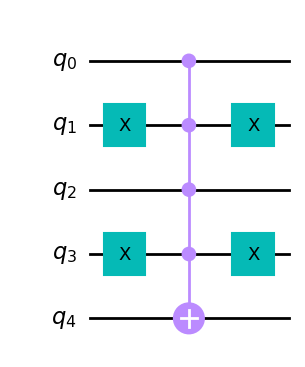

In [59]:
print('Oracle circuit')
oracle_circuit.draw(output='mpl')

Diffuser circuit


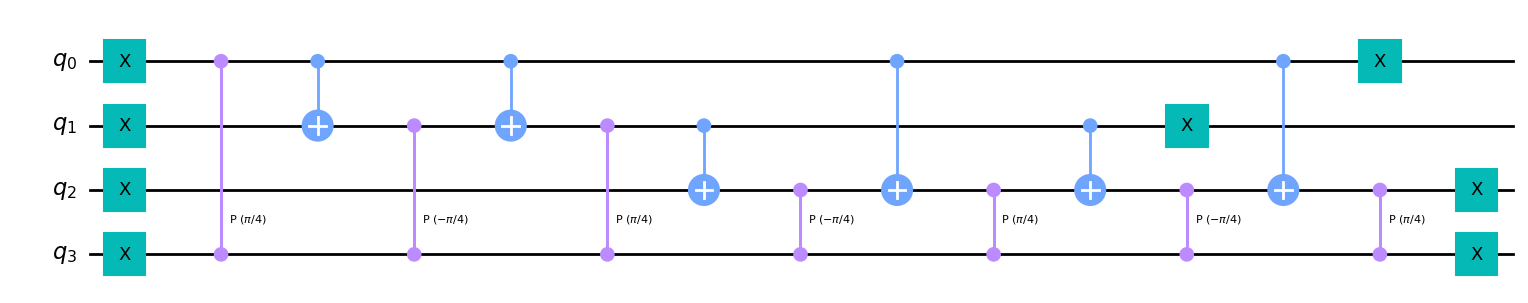

In [60]:
print('Diffuser circuit')
diffuser_circuit.draw(output='mpl')

Final Circuit Diagram


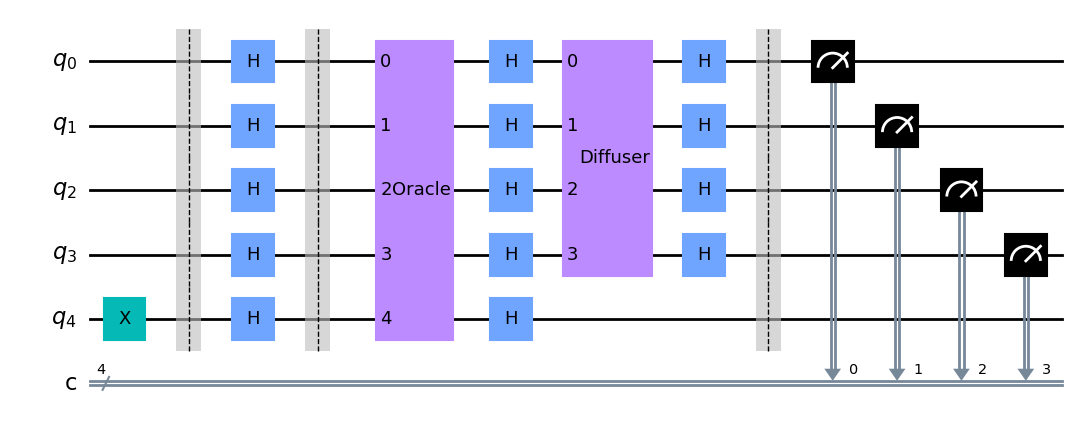

In [61]:
print('Final Circuit Diagram')
final_circuit.draw(output='mpl')

In [62]:
#Simulate the circuit
#We can run at local simulator or on quantum computer
#'qasm' 
#creating local simulator
simulator = Aer.get_backend('qasm_simulator')

In [63]:
#Execute - run the job 
#shots - number of times the job (circuit has to run) default 1024
#We are running it for 1000 shots
job = execute(final_circuit, backend = simulator, shots = 1000)
result=job.result()
counts = result.get_counts()
print(counts)

{'1100': 28, '0011': 35, '0001': 39, '0110': 42, '0101': 472, '0000': 32, '1101': 41, '0100': 34, '0111': 26, '1010': 31, '0010': 38, '1001': 36, '1110': 44, '1000': 36, '1111': 28, '1011': 38}


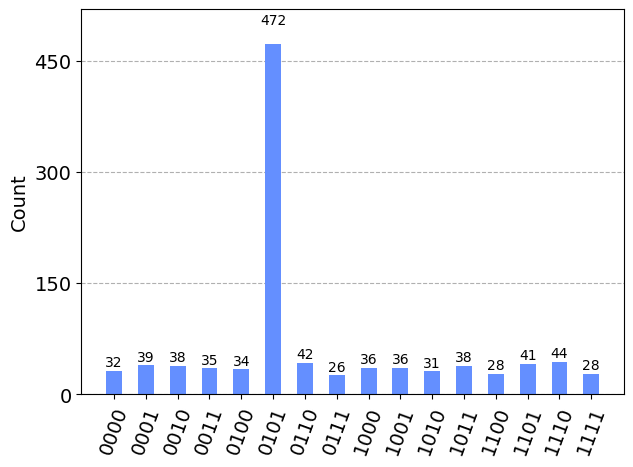

In [64]:
#plot the result counts on a histogram
plot_histogram(counts)

In [65]:
#Converts count to probability
total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}

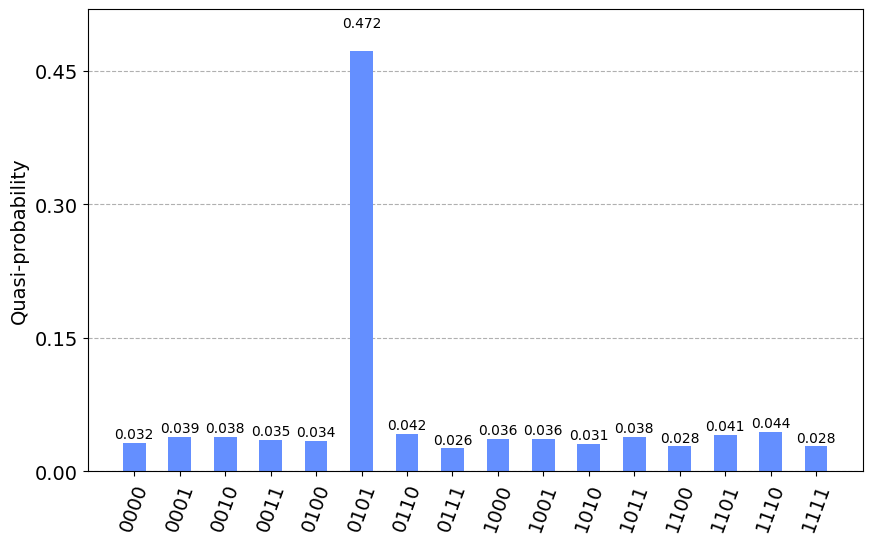

In [66]:
#Plot Probabilities
plot_histogram(probabilities , figsize=(10, 6))